In [2]:
%matplotlib notebook

In [3]:
import netCDF4 as nc4
import datetime as DT
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import numpy as np
#url = 'FRF-ocean_waves_awac02_201510.nc'
#url = 'FRF-ocean_waves_awac02_201509.nc'
url2 = 'http://wisdata.erdc.dren.mil/thredds/dodsC/frf/oceanography/waves/awac02/awac02.ncml'

#nc = nc4.Dataset(url)
nc = nc4.Dataset(url2)

In [37]:
tt = nc.variables['time'][:]
dates = nc4.num2date(tt,nc.variables['time'].units, nc.variables['time'].calendar)
date_index = [i for i in range(dates.shape[0]) if dates[i] > DT.datetime(2015,9,30) and dates[i] < DT.datetime(2015,11,1)]
#remove duplicates
isort = dates[date_index].argsort()
dates = dates[date_index][isort]
date_index = np.array(date_index)[isort]

<IPython.core.display.Javascript object>


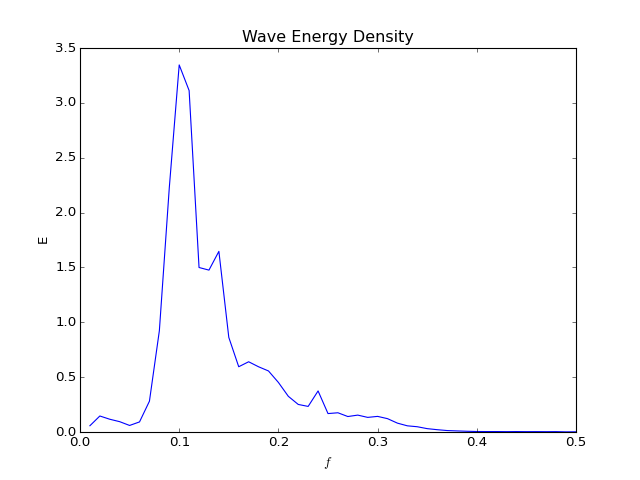

In [38]:
fig = plt.figure()
plt.plot(nc.variables['waveFrequency'][:],nc.variables['waveEnergyDensity'][date_index[0],:])
plt.xlabel('$f$')
plt.ylabel('E')
plt.title('Wave Energy Density')

<IPython.core.display.Javascript object>


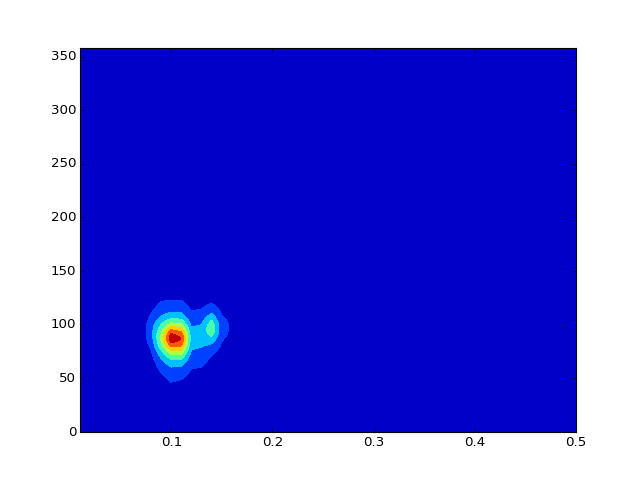

<matplotlib.contour.QuadContourSet instance at 0x7f5c62860680>

In [39]:
fig = plt.figure()
F,A = np.meshgrid(nc.variables['waveFrequency'][:],nc.variables['waveDirectionBins'][:])
plt.contourf(F,A,nc.variables['directionalWaveEnergyDensity'][date_index[0],:,:].transpose())

<IPython.core.display.Javascript object>


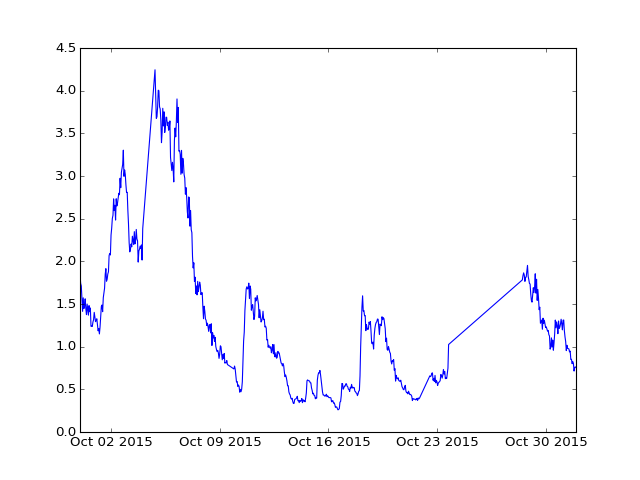

In [40]:
fig = plt.figure()
plt.plot(dates,nc.variables['waveHs'][date_index])

<IPython.core.display.Javascript object>


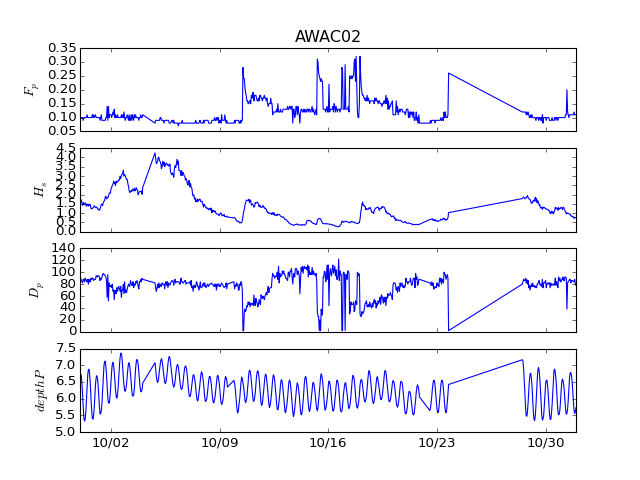

In [41]:
fig, ax = plt.subplots(4)
formatter = DateFormatter('%m/%d')
ax[0].plot(dates,nc.variables['waveFp'][date_index])
ax[0].set_ylabel('$F_p$')
ax[0].set_title('AWAC02')
plt.setp( ax[0].get_xticklabels(), visible=False)

ax[1].plot(dates,nc.variables['waveHs'][date_index])
ax[1].set_ylabel('$H_s$')
plt.setp( ax[1].get_xticklabels(), visible=False)

ax[2].plot(dates,nc.variables['waveDp'][date_index])
ax[2].set_ylabel('$D_p$')
plt.setp( ax[2].get_xticklabels(), visible=False)

ax[3].plot(dates,nc.variables['depthP'][date_index])
ax[3].set_ylabel('$depthP$')
ax[3].xaxis.set_major_formatter(formatter)

In [ ]:
#url = 'FRF-ocean_waves_awac02_201509.nc'
#nc2 = nc4.Dataset(url)
#nc4.num2date(nc2.variables['time'],nc2.variables['time'].units, nc2.variables['time'].calendar)